# Lionel Messi Career Analysis

---

Ever since enrolling himself at FC Barcelona youth academy, La Masia, at age 13, Lionel Messi has been a one-club-man. Having been offered a contract on a paper napkin, it is no doubt that FC Barcelona has made Leo the GOAT we all know and admire.

However, after 16 years at FC Barcelona, it has recently become quite clear that Leo is dissatisfied at FCB and has also expressed a desire to transfer to another club. With clashes and conflicts not only with the Spanish government but also with higher authorites and team management at the club, as well as differences in interests with teammates, it would not be a surprise if we do not see Leo in the famous red and blue of FC Barcelona next season.

With this news in mind, I deceided to carry out a data science project to analyse and take a look at La Pulga's FC Barcelona career through numbers and statistics. In this notebook, I will be analysing a number of football datasets available to get a deeper insight into Lionel Messi's footballing career at FC Barcelona.

Furthermore, it would be fun to see which club would be the next best destination for Leo to continue his professional football career.

![Lionel Messi approves!](Images/lionel_messi.jpg)

---

## Exploratory Data Analysis (EDA)

I have first performed an Exploratory Data Analysis to compute various crucial statistics such as average goals per game. For this, I have used the Football Events Dataset available [here](https://www.kaggle.com/secareanualin/football-events).

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading and pre-processing datasets

#### Events Dataset

The dataset provides a granular view of **9,074 games**, totaling **941,009 events** from the biggest 5 European football leagues: Bundesliga (Germany), La Liga (Spain), Ligue 1 (France), Premier League (England) and Serie A (Italy) from the **2011/2012** season to the **2016/2017** season.

Let's read this dataset and call the *.info()* function to see detailed information about the dataset, including column names and datatypes.

In [2]:
events = pd.read_csv("Data/events.csv")
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
id_odsp          941009 non-null object
id_event         941009 non-null object
sort_order       941009 non-null int64
time             941009 non-null int64
text             941009 non-null object
event_type       941009 non-null int64
event_type2      214293 non-null float64
side             941009 non-null int64
event_team       941009 non-null object
opponent         941009 non-null object
player           880009 non-null object
player2          291310 non-null object
player_in        51715 non-null object
player_out       51738 non-null object
shot_place       227459 non-null float64
shot_outcome     228498 non-null float64
is_goal          941009 non-null int64
location         467067 non-null float64
bodypart         229185 non-null float64
assist_method    941009 non-null int64
situation        229137 non-null float64
fast_break       941009 non-null int64
dtypes: floa

The dataset consists of **22 columns** describing various elements related to a football event, such as the player involved and opponent team.

In [3]:
events.head(10)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


We can see here that some columns such as *shot_place*, *shot_outcome* and *location* have numerical values. These numerical values indicate different possible values for the particular column. These possible values for each column are specified in the text file, *dictionary.txt*.This text file will be used later to replace the numerical values with appropriate values for the columns.

#### Summary statistics for events dataset

Let's now compute the summary statistics for the events dataset.

In [4]:
events.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


#### General information (ginf) dataset

The *ginf* dataset contains general information and metadata about each game in the events dataset. I will use this dataset along with the events dataset loaded above to get more information to describe each game in the football events dataset.

In [5]:
ginf = pd.read_csv("Data/ginf.csv")
ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
id_odsp      10112 non-null object
link_odsp    10112 non-null object
adv_stats    10112 non-null bool
date         10112 non-null object
league       10112 non-null object
season       10112 non-null int64
country      10112 non-null object
ht           10112 non-null object
at           10112 non-null object
fthg         10112 non-null int64
ftag         10112 non-null int64
odd_h        10112 non-null float64
odd_d        10112 non-null float64
odd_a        10112 non-null float64
odd_over     977 non-null float64
odd_under    977 non-null float64
odd_bts      977 non-null float64
odd_bts_n    977 non-null float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


The *ginf* dataset consists of 18 columns such as *ht* (home team), *at* (away team), *league* and *country* to further describe each match in the events dataset.

In [6]:
ginf.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN
8,UBZQ4smg/,/soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...,True,2011-08-06,F1,2012,france,Nice,Lyon,1,3,4.50,3.55,2.00,NaN,NaN,NaN,NaN
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN


#### Summary statistics for ginf dataset

In [7]:
ginf.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


#### Join events dataset with ginf dataset

Next, I have joined the events and ginf datasets on the common column *id_odsp*, into the DataFrame *events_data* which containes detailed data about the football events. I will be using this DataFrame to perform all the required analysis.

In [8]:
events_data = ginf.merge(events, how="left")
events_data.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,6.0,2.0,0.0,9.0,2.0,1.0,1.0,0.0
1,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
2,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
3,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
4,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0,NaN,0.0
5,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
6,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
7,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0,NaN,0.0
8,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
9,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0


#### Pre-processing dataset by giving names for events

As stated earlier, the text file *dictionary.txt* contains relevant values for different columns in the events dataset. For example, a numerical value of 6.0 for the column *shot_place* denotes "High and wide", i.e. the attempted shot went high and wide from the target. Similarly, a numerical value of 2.0 for *shot_outcome* stands for "Off target" , i.e. the shot was off target.

Below, I have read the text file and replaced the numerical values for each column with the appropriate values corresponding to each numerical value.

In [9]:
new = dict()
with open("Data/dictionary.txt") as f:
    data = f.read()
data = data.split("\n\n\n")
for i in range(len(data)):
    if data[i]:
        variable = data[i].split("\n")[0]
        values = data[i].split("\n")[1:]
        new[variable] = {int(val.split("\t")[0]):val.split("\t")[1] for val in values}
        
for name in new:
    events_data[name] = events_data[name].map(new[name])

events_data.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,High and wide,Off target,0.0,Left side of the box,left foot,Pass,Open play,0.0
1,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
2,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
3,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
4,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,Defensive half,NaN,None,NaN,0.0
5,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
6,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
7,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,Defensive half,NaN,None,NaN,0.0
8,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
9,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0


### Filtering events for Lionel Messi

Since we are interested in analysing Lionel Messi's career, I have filtered only those events from the DataFrame *events_data* that involve Lionel Messi, exluding all other events.

In [10]:
lionel_messi_events = events_data.loc[events_data["player"]=="lionel messi"]
lionel_messi_events.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
9142,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
9147,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,Bottom left corner,On target,0.0,Difficult angle on the left,left foot,Pass,Open play,0.0
9151,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,Bottom right corner,On target,0.0,Outside the box,left foot,None,Open play,0.0
9155,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
9164,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
9192,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,Bottom right corner,On target,1.0,Right side of the six yard box,right foot,Through ball,Open play,0.0
9205,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,Centre of the goal,On target,0.0,Left side of the box,left foot,Pass,Open play,0.0
9211,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
9212,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,Centre of the goal,On target,1.0,Very close range,left foot,Pass,Open play,0.0
10952,vJhKQJeo/,/soccer/spain/primera-division-2011-2012/real-...,True,2011-09-10,SP1,2012,spain,Real Sociedad,Barcelona,2,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0


### Computing crucial statistics

In order to perform the analysis, I have computed various statistics that are crucial to describe a footballer's performance.

For a forward (and #10) the most important stats are **average goals per game**, **attempts** as well as **efficiency** from free-kicks and penalties. These can be considered as some of the **Key Performance Indicators (KPIs)** for a striker such as Lionel Messi.

Let's take a look at these stats to better understand and analysis Leo's career at FC Bercelona.

#### 1. Average Goals per Game (GPG)

**Average Goals per Game (GPG)** can be defined as the number of goals a player is expected to score per match that he plays. It is an important statistic to determine how good a player is when it comes to scoring goals in games and canm be calculated by dividing the total number of goals scored by the total number of matches played.

Based on the data available in the football events dataset, I have plotted the average GPG for Lionel Messi over multiple seasons. The overall average GPG is also shown below.

In [11]:
# Filtering goals scored by Lionel Messi
lionel_messi_goals = lionel_messi_events.loc[events_data["is_goal"]==1 & (events_data["event_type2"]!="Own goal")]

# Average goals-per-game (GPG) by season and overall
lionel_messi_matches = lionel_messi_events.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
avg_GPG = pd.DataFrame({"avg_GPG" : (lionel_messi_goals.groupby("season").count().is_goal) / (lionel_messi_matches.groupby("season").count().id_odsp)}).reset_index()

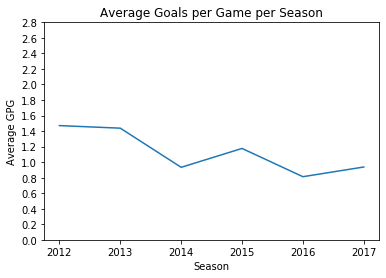

In [12]:
# Plot average goals per game by season
plt.plot(avg_GPG["season"], avg_GPG["avg_GPG"])
plt.title("Average Goals per Game per Season")
plt.xlabel("Season")
plt.ylabel("Average GPG")
plt.yticks(np.arange(0, 3, step=0.2))
plt.show()

In [13]:
print("\nNumber of matches played: ", lionel_messi_matches.count().id_odsp)
print("Number of goals scored: ", lionel_messi_goals.count().id_odsp)
print("Overall Average GPG: ", round(avg_GPG.mean().avg_GPG, 2))


Number of matches played:  178
Number of goals scored:  205
Overall Average GPG:  1.13


Lionel Messi has maintained an average GPG value of **1.13**, meaning that on average Leo scored atleast 1 goal in each match that he played. That is a fairly impressive stat for a striker in terms of goal-scoring ability.

But how does Leo manage to score, on average, 1 goal in each game that he plays. To better understand this, let's have alook at his attempt statistics, which includes the number of attempts at goal made by Leo per match.

#### 2. Attempt Statistics

In [14]:
# Filtering attempts made by Lionel Messi
lionel_messi_attempts = lionel_messi_events.loc[lionel_messi_events["event_type"]=="Attempt"]
print("\nNumber of attempts made: ", lionel_messi_attempts.count().id_odsp)
print("Number of attempts per match: ", round((lionel_messi_attempts.count().id_odsp) / (lionel_messi_matches.count().id_odsp), 4))

# Attempts per goal
print("Attempts per goal: ", round((lionel_messi_attempts.count().id_odsp) / (lionel_messi_goals.count().id_odsp), 4))


Number of attempts made:  914
Number of attempts per match:  5.1348
Attempts per goal:  4.4585


Although Leo takes an average of **4.45 attempts at goal to actually score a goal**, he manages to get a goal in each game by registering multiple attempts at goal, with an average of **5.13 attempts at goal per match**. Due to this high number of attempts at goal, Leo ends up scoring atleast 1 goal from the multiple attempts.

Having more than 5 attempts at goal on average is a great indication of the hunger Leo has for scoring goal and winning games, making him one of the greatest footballers we know.

#### 3. Free kicks and Penalties

Let's not look at how Messi performs from spot-kicks such as penalties and free-kicks.

In [15]:
# Filtering penalties
lionel_messi_penalties = lionel_messi_events.loc[lionel_messi_events["location"]=="Penalty spot"]

# Penalty efficiency
penalty_goals = lionel_messi_penalties.loc[lionel_messi_penalties["is_goal"]==1]
print("\nNumber of penalties: ", lionel_messi_penalties.count().id_odsp)
print("Number of goals from penalties: ", penalty_goals.count().id_odsp)
print("Penalty efficiency: ", round((penalty_goals.count().id_odsp) / (lionel_messi_penalties.count().id_odsp), 4))


Number of penalties:  37
Number of goals from penalties:  30
Penalty efficiency:  0.8108


Of the 37 penalties that Leo has attempted, 30 touched the back of the net, giving Leo a penalty efficiency of **81%**. "Impressive" would be an understatement here.

In [16]:
# Filtering free kicks
lionel_messi_free_kicks = lionel_messi_events.loc[lionel_messi_events["situation"]=="Free kick"]

# Free kick efficiency
free_kick_goals = lionel_messi_free_kicks.loc[lionel_messi_free_kicks["is_goal"]==1]
print("\nNumber of free kicks: ", lionel_messi_free_kicks.count().id_odsp)
print("Number of goals from free kicks: ", free_kick_goals.count().id_odsp)
print("Free kick efficiency: ", round((free_kick_goals.count().id_odsp) / (lionel_messi_free_kicks.count().id_odsp), 4))


Number of free kicks:  86
Number of goals from free kicks:  14
Free kick efficiency:  0.1628


However, when it comes to free-kicks, Leo's record isn't very impressive, having converted only 14 of the 86 free-kicks that he has attempted (efficiency of **16.2%**).

#### 4. Assists and Partnerships

Football, being a team sport invloves players assisting their teammates as well as being assisted by teammates to win games.

Therefore, let's see what percentage of goals scored by Leo were assisted by a teammate and who are his best partners in scoring goals.


Percentage of assisted goals:  65.3659

Partnerships:


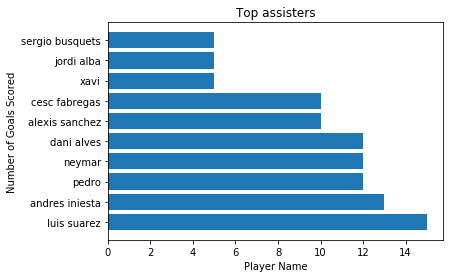

In [17]:
# Goals from assists
goals_from_assists = lionel_messi_goals.loc[lionel_messi_goals["assist_method"]!="None"]
print("\nPercentage of assisted goals: ", round(100*((goals_from_assists.count().id_odsp)/(lionel_messi_goals.count().id_odsp)), 4))

# Partnerships
print("\nPartnerships:")

# Top assisters
assisters = lionel_messi_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(assisters["player2"], assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

Hence, **65.36% of goals scored** by Lionel Messi were assisted by his teammates, meaning that Leo combines well with his teammates to create as many chances as possible and score as many goals as possible.

This was seen clearly when FC Barcelona dominated world football having Leo, Iniesta and Xavi on their team, with the three combining together to craft deadly plays and give the opponents nightmares. After the departure of Xavi and Iniesta from FC Barcelona, we saw something similar during the MSN era, with the front 3 of Messi, Suarez and Neymar combining in front of goal in a deadly fashion.

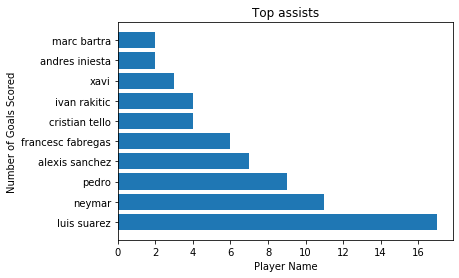

In [18]:
# Top assists
lionel_messi_assists = events_data.loc[(events_data["assist_method"]!="None") & (events_data["is_goal"]==1) & (events_data["player2"]=="lionel messi")]
assists = lionel_messi_assists.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(assists["player"], assists["id_odsp"])
plt.title("Top assists")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

It is evident from the above 2 bar plots that Leo partners up well with **Luis Suarez**, **Neymar** and **Andres Iniesta**. This could be a great point which influences where Leo could be headed next in case he chooses to leave FC Barcelona and look for a new club.

Reuniting with Luis Suarez at Atletico Madrid under fellow Argentine manager Diego Simone, or with Neymar at PSG, that is the question.

---

## Machine Learning Model for Expected Goals (xGoals)

Next, I have taken a probabilistic approach in order to predict the expected goals for a player based on the detailed data available in the football events dataset. The main objective of this part of the project is to calculate the probability of an attempt being a goal based on the data avialable reagrding the particular attempt.

In the *events_data* DataFrame created above by joining the *events* and *ginf* datasets, the *is_goal* column indicates whether the attempt made by a player resulted in a goal. A value of 1 for the *is_goal* column denotes a goal being scored, whereas 0 signifies no goal.

Using a simple machine learning algorithm, Logistic Regression, I will be calculating to probability of an attempt being a goal. Logistic Regression uses the sigmoid function to calculate the probability value for each record of the dataset. Calculating a probability value for the column *is_goal* based on available data will give us the probability of an attempt being a goal. Finally, summing up all probability values predicted by the Logistic Regression model will give us the number of goals a player is expected to score, given the conditions in which the attempt was made.

The value of expected goals can then be compared to the value of actual goals scored by a player to evaluate the player's performance in front of goal.

### Importing required libraries

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_roc_curve

### Dataset preparation

The column *event_type* records the type of event for each events detailed in the dataset, such as *attempt*, *corner* and *foul*. I have filtered the DataFrame *events_data* into the DataFrame *shots* to include only records about attempts made at goal. The *shots* DataFrame will be used to train the Logistic Regression model.

The columns *location*, *bodypart*, *assist_method*, *situation* and *shot_place* contain categorical values to describe the attempt in a detailed manner. These columns have been converted to dummies using the *get_dummies()* function to encode the categorical values into numerical values before training the Logistic Regression model.

The *is_goal* column is the target column (Y) and all other columns are used as data columns (X).

In [20]:
shots = events.loc[events["event_type"]==1]
shot_predictions = shots.iloc[:, [14, 16, 17, 18, 19, 20, 21]]
shot_predictions = pd.get_dummies(shot_predictions, columns=['location', 'bodypart','assist_method', 'situation', 'shot_place'])
shot_predictions.columns = ['is_goal', 'fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right', 'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range', 'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header', 'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick', 'bit_too_high', 'blocked', 'bottom_left', 'bottom_right', 'centre', 'high_wide', 'bar', 'miss_left', 'miss_right', 'too_high', 'top_centre', 'top_left', 'top_right']

# Target and data columns
X = shot_predictions.iloc[:, 1:]
Y = shot_predictions.iloc[:, 0]

# Split dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Building xGoals Model using Logistics Regression

As stated above, Logistic Regression uses the sigmoid function to calculate a probability value for each record of the dataset. This will be the best choice as we want to calculate the probability of an attempt resulting in a goal in order to calculate a value for expected goals. Hence, a Logistic Regression model is used for training and prediction.

In [21]:
# Training and predictong using logistic regression model
xgmodel = LogisticRegression()
xgmodel.fit(X_train, Y_train)
Y_pred = xgmodel.predict(X_test)
Y_pred_prob = xgmodel.predict_proba(X_test)

#### Accuracy and Performance Metrics


Accuracy:  93.85

ROC-AUC Score:  0.9648


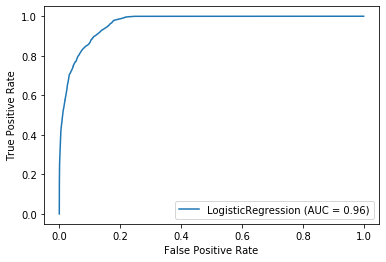

In [22]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("\nAccuracy: ", round(100*accuracy, 2))

# ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_prob[:, 1])
print("\nROC-AUC Score: ", round(roc_auc, 4))

# Plot ROC-AUC curve
plot_roc_curve(xgmodel, X_test, Y_test)

As we can see, the model obtains an **accuracy of 93.85%** with and **ROC-AUC Score of 0.9648**, meanong that the model is doing its job well in predicting 0's as 0's and 1's as 1's. Therefore, this model for expected goals has fairly high accuracy and can be used for calculating the value for expected goals.

In [23]:
# Confusion matrix
CM = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix: \n", CM)


Confusion Matrix: 
 [[40086   901]
 [ 1917  2923]]


In [24]:
# Classification report
report = classification_report(Y_test, Y_pred)
print("\nClassification Report: \n", report)


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     40987
           1       0.76      0.60      0.67      4840

    accuracy                           0.94     45827
   macro avg       0.86      0.79      0.82     45827
weighted avg       0.93      0.94      0.94     45827



#### Columns for Expected Goals and Difference

Next, I have created a new DataFrame *goals* which contains the values for expected goals, actual goals as well as the difference between actual and expected goals. The value for the column *expected* in the *goals* DataFrame is predicted using the Logistic Regression model trained above.

In [25]:
xgoals = xgmodel.predict_proba(X)
goals = X.copy()
goals["actual"] = Y
goals["expected"] = xgoals[:, 1]
goals["difference"] = goals["expected"] - goals["actual"]
goals = goals.iloc[:, 40:44]
goals = pd.concat([events, goals], axis=1)

#### Expected vs Actual Goals for Lionel Messi

Teh following code cell filters the *goals* DataFrame to include only events where Lionel Messi is the main player involved. The value for expected goals to be scored by Lionel Messi is calculated by summing up the values in the column *expected*. Similarly, the value for actual goals scored by Leo is calculated by summing the values in the column *actual*. Let's take alook at the difference between these 2 values.

In [26]:
lionel_messi_goals = goals.loc[goals["player"]=="lionel messi"]
lionel_messi_xgoals = lionel_messi_goals.sum().expected
lionel_messi_actual = lionel_messi_goals.sum().actual
diff = lionel_messi_actual - lionel_messi_xgoals
print("\nExpected: ", round(lionel_messi_xgoals, 4))
print("Actual: ", lionel_messi_actual)
print("Difference: ", round(diff, 4))


Expected:  170.1114
Actual:  205.0
Difference:  34.8886


As we can see, Lionel Messi has scored **~35 more goals** than expected. An average footballer given the same opportunities and situations as Lionel Messi would have scored 170 goals on average. On the other hand, Leo actually scored 205. This indicates how Lionel Messi is an extraordinary goal scorer.

---

## Future Prospects

For the final part of this project, I have performed a basic anlysis for **Europe's top 5 football leagues** to see where Lionel Messi could be headed next in case of a departure from FC Barcelona. I have provided my own verdict on which club would be the best next destination for Leo based on how well he fits at the club.

First, I have collected data about **league points** for each of the top 5 European leagues from **2004-2018**. Based on this points data, I have calculated the **average point difference** between 2 consecutive teams in each league. I have used these values as a measure of the **degree of competition** in each league. It can be said that the higher the average point difference, the less competitive that league is.

### League Points Datasets

In [27]:
bundesliga_points = pd.read_csv("Data/bundesliga_points.csv")
laliga_points = pd.read_csv("Data/laliga_points.csv")
ligue1_points = pd.read_csv("Data/ligue1_points.csv")
premierleague_points = pd.read_csv("Data/premierleague_points.csv")
seriea_points = pd.read_csv("Data/seriea_points.csv")

### Average point difference between teams in Europe's Top 5 leagues

In [28]:
# Function to calculate average points difference between consecutive teams
def average_point_difference(points):
    points = points.values.tolist()
    diff = []
    for i in range(len(points)-1):
        diff.append(np.array(points[i])-np.array(points[i+1]))
    diff = np.matrix(diff)
    avg_pd = np.sum(diff)/np.prod(diff.shape)
    return round(avg_pd, 4)

### Determining league competition based on average point difference

In [29]:
print("\nAverge point difference (2004-2018)")

# Bundesliga
print("\nBundesliga: ", average_point_difference(bundesliga_points))
# La liga
print("\nLa Liga: ", average_point_difference(laliga_points))
# Ligue 1
print("\nLigue 1: ", average_point_difference(ligue1_points))
# Premier League
print("\nPremier League: ", average_point_difference(premierleague_points))
# Serie A
print("\nSerie A: ", average_point_difference(seriea_points))


Averge point difference (2004-2018)

Bundesliga:  3.1882

La Liga:  3.3123

Ligue 1:  3.0211

Premier League:  3.414

Serie A:  3.414


According to the results from the above analysis, it can be said that **Ligue 1 (France)** is the most competitive league in Europe with an average difference of **3.02 points** between 2 consecutive teams. But we know how PSG and AS Monaco dominate Ligue 1, running way ahead of other teams in the league in terms of points. However, the result maybe due to the lower placed teams having very less difference in points.

The least competitive leagues are **Premier League (England)** and **Serie A (Italy)** with an average point difference of **3.41** points between teams. A high points difference in Premier League teams may be attributed to the fact that teams are distributed quite uniformly in terms of points, making PL the most exciting league among the 5. Serie A mimcks Ligue 1 with Juventus, Inter Milan and AC Milan dominating the league.

### Analysing Europe's Top 5 Leagues

Let's now analyse each league individually to gain more understanding about the leagues.

![Europe's Top 5 Leagues](Images/europe-top-five-leagues.jpg)

#### Filtering events data for each league

In the following code cell, I have filtered the DataFrame *events_data* into 5 distinct DataFrame for each of the 5 leagues based on the *country* column.

In [30]:
# Creating a new column for goals scored per match
events_data["goals_scored"] = events_data["fthg"] + events_data["ftag"]

# Filtering events data for 5 major European leagues
bundesliga = events_data.loc[events_data["country"]=="germany"]
laliga = events_data.loc[events_data["country"]=="spain"]
ligue1 = events_data.loc[events_data["country"]=="france"]
premierleague = events_data.loc[events_data["country"]=="england"]
seriea = events_data.loc[events_data["country"]=="italy"]

#### Match-wise data

In [31]:
# Grouping data match-wise for each league
bundesliga_matches = bundesliga.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()   
laliga_matches = laliga.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
ligue1_matches = ligue1.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
premierleague_matches = premierleague.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
seriea_matches = seriea.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()

#### Average Goals per Game (GPG) for each league

Next, I have calculated the average Goals per Game for each league, in the same way as done before, in order to see which league is most similar to La Liga in terms of goal scoring.

In [32]:
# Filtering goals for each league
bundesliga_goals = bundesliga.loc[bundesliga["is_goal"]==1]
laliga_goals = laliga.loc[laliga["is_goal"]==1]
ligue1_goals = ligue1.loc[ligue1["is_goal"]==1]
premierleague_goals = premierleague.loc[premierleague["is_goal"]==1]
seriea_goals = seriea.loc[seriea["is_goal"]==1]

In [33]:
# GPG for each major European league
print("Average goals-per-game for Europe's 5 major leagues")

# Bundesliga
print("Bundesliga: ", round(bundesliga.goals_scored.mean(), 4))
# La Liga
print("La Liga: ", round(laliga.goals_scored.mean(), 4))
# Ligue 1
print("Ligue 1: ", round(ligue1.goals_scored.mean(), 4))
# Premier League
print("Premier League: ", round(premierleague.goals_scored.mean(), 4))
# Serie A
print("Serie A: ", round(seriea.goals_scored.mean(), 4))

Average goals-per-game for Europe's 5 major leagues
Bundesliga:  2.8739
La Liga:  2.7742
Ligue 1:  2.5187
Premier League:  2.7382
Serie A:  2.6521


The average Goals per Game (GPG) for **La Liga** is **2.77** and on average, **2.73** goals are scored in a **Premier League** match. This m,eans that La Liga and Premier League are very much similar in terms of goals scored per match. Hence, it can be said that Leo would get a similar goal scoring environment in England as he gets in Spain.

**Bundesliga** is the highest scoring league with **2.87** goals per game meaning that Leo could also enjoy scoring more goals in Germany.

#### Average Penalties per Match

We saw above how Leo converts 81% of the penalties he attempts. Therefore, let's now see the average penalties per match in each of the 5 leagues.

In [34]:
# Penalties for each league
print("\nAverage number of penalties per match")

# Bundesliga
print("Bundesliga: ", round(bundesliga.loc[bundesliga["location"]=="Penalty spot"].id_odsp.count() / bundesliga_matches.id_odsp.count(), 4))
# La Liga
print("La Liga: ", round(laliga.loc[laliga["location"]=="Penalty spot"].id_odsp.count() / laliga_matches.id_odsp.count(), 4))
# Ligue 1
print("Ligue 1: ", round(ligue1.loc[ligue1["location"]=="Penalty spot"].id_odsp.count() / ligue1_matches.id_odsp.count(), 4))
# Premier League
print("Premier League: ", round(premierleague.loc[premierleague["location"]=="Penalty spot"].id_odsp.count() / premierleague_matches.id_odsp.count(), 4))
# Serie A
print("Serie A: ", round(seriea.loc[seriea["location"]=="Penalty spot"].id_odsp.count() / seriea_matches.id_odsp.count(), 4))


Average number of penalties per match
Bundesliga:  0.2473
La Liga:  0.2743
Ligue 1:  0.2776
Premier League:  0.1505
Serie A:  0.3329


On average, the most number of penalties are given away in **Serie A**, while **Premier League** comes out as the **cleanest league** giving away the least penalties. Moving to a league with a higher value for average penalties per match may be a good choice for Lionel Messi in order to continue scoring more and more goals.

#### Average Free kicks per Match

In [35]:
# Free kicks for each league
print("\nAverage number of free kicks per match")

# Bundesliga
print("Bundesliga: ", round(bundesliga.loc[bundesliga["situation"]=="Free kick"].id_odsp.count() / bundesliga_matches.id_odsp.count(), 4))
# La Liga
print("La Liga: ", round(laliga.loc[laliga["situation"]=="Free kick"].id_odsp.count() / laliga_matches.id_odsp.count(), 4))
# Ligue 1
print("Ligue 1: ", round(ligue1.loc[ligue1["situation"]=="Free kick"].id_odsp.count() / ligue1_matches.id_odsp.count(), 4))
# Premier League
print("Premier League: ", round(premierleague.loc[premierleague["situation"]=="Free kick"].id_odsp.count() / premierleague_matches.id_odsp.count(), 4))
# Serie A
print("Serie A: ", round(seriea.loc[seriea["situation"]=="Free kick"].id_odsp.count() / seriea_matches.id_odsp.count(), 4))


Average number of free kicks per match
Bundesliga:  0.5805
La Liga:  0.5653
Ligue 1:  0.5918
Premier League:  0.2995
Serie A:  0.6543


#### Top Assisters

The next few bar plots show the players with the highest number of assists in each league.

##### 1. Bundesliga

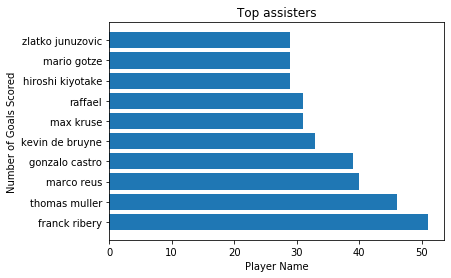

In [36]:
bundesliga_assisters = bundesliga_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(bundesliga_assisters["player2"], bundesliga_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 2. La Liga

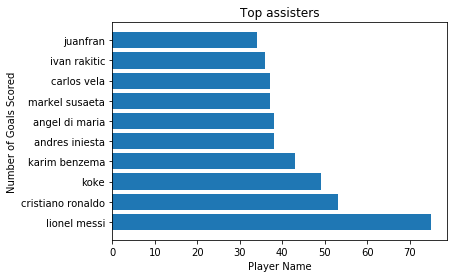

In [37]:
laliga_assisters = laliga_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(laliga_assisters["player2"], laliga_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 3. Ligue 1

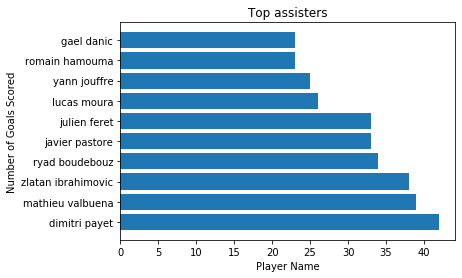

In [38]:
ligue1_assisters = ligue1_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(ligue1_assisters["player2"], ligue1_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 4. Premier League

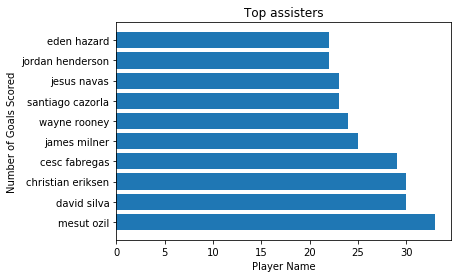

In [39]:
premierleague_assisters = premierleague_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(premierleague_assisters["player2"], premierleague_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 5. Serie A

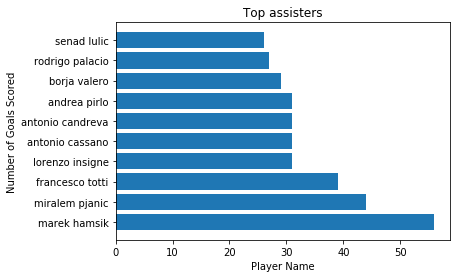

In [40]:
seriea_assisters = seriea_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(seriea_assisters["player2"], seriea_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

### Next Club

In this section I have provided my verdict on which club should Lionel Messi sign for next in case he chooses to leave FC Barcelona.

I have taken into consideration the following clubs as possible next destinations for Leo:
   1. Manchester City (Premier League)
   2. Paris Saint-Germain (Ligue 1)
   3. Bayern Munich (Bundesliga)
   4. Juventus (Serie A)
   5. Atletico Madrid (La Liga)

#### 1. Manchester City

![Manchester City](Images/manchester-city.png)

We've seen how Guardiola's Barcelona dominated La Liga with Messi consistently being their star. In a similar fashion, Manchester City has dominated the Prem for the last few seasons, finishing the 2017-18 season with a record-breaking 100 points. Guardiola and Messi coming together once again at City would be really exciting.

With top-notch assisters such as Kevin De Bruyne and Bernardo Silva as well as fellow Argentine Sergio Aguero, Manchester City appears to be the best club for Messi to sign for next. Playing at City in the Premier League guarantees Leo a UCL spot and makes City even stronger contenders for the Premeir League title.

We saw above, the average Goals per Game for the Premier League is 2.73, which makes it a high-scoring league. Leo playing at City means that we could see a lot more goals from La Pulga. However, Leo may not get to take as many penalties and free kicks as he does in La Liga (avg penalties per game: 0.15; avg free-kicks per game: 0.29).

#### 2. Paris Saint-Germain

![Paris Saint-Germain](Images/psg.jfif)

PSG, owned by Qatar Sports Investments, are one of the richest clubs in the world, meaning that they are one of the few teams that have the financial power required to purchase Lionel Messi.

Playing at PSG could put Lionel Messi at the center of a deadly front three - Kylian Mbappe, Lionel Messi and former Barcelona teammate Neymar. Fellow Argentine Angel Di Maria also plays at PSG, which means Leo could fit in well at PSG.

Average number of penalties and free-kicks per match are also nearly similar for La Liga and Ligue 1, meaning Leo would get a similar number of chances to score from spot kicks.

However, PSG may not be the first choice for next club, being beaten by Manchester City. Ligue 1 is not as competitive as Premier League, often called "Farmers' League". Still at the top of his game, Manchester City would be a better move for Leo to continue his career and compete at the topmost level.

#### 3. Bayern Munich

![Bayern Munich](Images/bayern-munich.png)

Bayern Munich has been the top club in Germany for as long as we know. Regularly competing in the UCL and winning the Bundesliga will be guaranteed to Leo should he choose to sign for Bayern Munich. Bundesliga is also the highest scoring league among the 5, with an average of 2.87 Goals per Game. A high scoring league such as Bundesliga, as well as a high scoring team such as Bayern Munich would be a good choice for Leo.

However, Messi may not adapt well to the German style of play, having played Barcelona's tiki-taka for all of his career. This makes Bayern rank 3rd in the best next club for Leo.

#### 4. Juventus

![Juventus](Images/juventus.png)

Moving to Juventus would get CR7 and Leo in the same team for the very first time. However, Juventus may not have enough finances to purchase Leo.

Joining Juventus could result in either of the following 2 things - Juventus being overpowered and dominating world football or Ronaldo and Messi clashing and not getting along well, competing to be the best in the world.

#### 5. Atletico Madrid

![Atletico Madrid](Images/atletico-madrid.png)

Atletico Madrid, with Argentine manager Diego Simone and former FC Barcelona teammate Luis Suarez would be a good choice for Lionel Messi if he chooses to stay in Spain's La Liga. Playing in the same league will do Leo good, without the stress of moving to a new country.

Other clubs such as Premier League's Liverpool and Manchester United, Serie A's Inter Milan, Japan's Vissel Kobe (where former FCB teammate Andres Iniesta currently plays) and Qatar's Al Sadd (managed by former Barca teammate Xavi) are good choices too, but a transfer to any of these teams is highly unlikely.